In [4]:
import numpy as np
import matplotlib.pyplot as plt
#import keras
import pandas as pd

In [5]:
dp = pd.read_csv("C:/Users/HP/Desktop/depression/Depression_intensity_final.csv", encoding="ISO-8859-1")
#dp =dp.head(10000)
#dp
    
    


In [6]:
#x=dp[dp['Label']==1]
#x

In [7]:
x1=dp[dp['Label']==0]
x1
x1 = x1.sample(frac=0.05)
x1

,Unnamed: 0.1,Unnamed: 0,Text,Label
186,186,206.0,I know someone that took 3 years to get over d...,0
14924,12736,NaN,missin my mom &amp; dad they went out w/out me,0
3748,1560,NaN,@JaqStone and @Lurquer Thank you for spreading...,0
5907,3719,NaN,@MakeupLoveer thank u sweetie have a fun day...,0
30260,28072,NaN,@YourSavvyVA Same. Have a full day of tasks an...,0
...,...,...,...,...
45263,43075,NaN,Already looking forward to Chelsea Chelsea Ban...,0
15956,13768,NaN,just woke up! am meant to be at work right now...,0
9457,7269,NaN,@bunnyBISOUS so sorry but I guess it is NYC,0
22589,20401,NaN,@19fischi75 hav a nice day Sweetheart,0


In [9]:
!pip install tensorflow

^C


In [11]:
#!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.5.tar.gz

In [7]:
import en_core_web_sm

nlp = en_core_web_sm.load()

In [8]:
### utlity function for pre-processing the text
import spacy

# load english language model and create nlp object from it
#nlp = spacy.load("en_core_web_sm") 

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

In [9]:
dp['preprocessed_txt'] = dp['Text'].apply(preprocess) 

In [10]:
dp.to_csv("Depression_intensity_final.csv")

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    dp.preprocessed_txt, 
    dp.Label, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=dp.Label
)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
tvec = TfidfVectorizer()
x_train_tfidf = tvec.fit_transform(X_train)
x_validation_tfidf = tvec.transform(X_test)

In [14]:
x_train_tfidf

<43693x56379 sparse matrix of type '<class 'numpy.float64'>'
	with 306503 stored elements in Compressed Sparse Row format>

In [15]:
from sklearn.metrics import classification_report

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



#1. create a pipeline object
clf = KNeighborsClassifier()

#2. fit with X_train and y_train
clf.fit(x_train_tfidf, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(x_validation_tfidf)
df_table = confusion_matrix(y_test,y_pred)
print (df_table)


#4. print the classfication report
print(classification_report(y_test, y_pred))

[[7894  690]
 [2129  211]]
              precision    recall  f1-score   support

           0       0.79      0.92      0.85      8584
           1       0.23      0.09      0.13      2340

    accuracy                           0.74     10924
   macro avg       0.51      0.50      0.49     10924
weighted avg       0.67      0.74      0.69     10924



In [17]:
print('accuracy:', (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1]))
print ('precision:', df_table[1,1] / (df_table[1,1] + df_table[0,1]))
print('recall:', df_table[1,1] / (df_table[1,1] + df_table[1,0]))

p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
print('f1 score: ', (2*p*r)/(p+r))

accuracy: 0.7419443427316001
precision: 0.2341842397336293
recall: 0.09017094017094017
f1 score:  0.13020672631903735


In [18]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



#1. create a pipeline object
clf =LogisticRegression(solver="liblinear")

#2. fit with X_train and y_train
clf.fit(x_train_tfidf, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(x_validation_tfidf)
df_table = confusion_matrix(y_test,y_pred)
#print (df_table)
name ='LogisticRegression'
print("%s: accuracy:   %.2f%% " % (name, (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1])))
print ("%s:precision:  %.2f%%" %(name, df_table[1,1] / (df_table[1,1] + df_table[0,1])))
print("%s: recall:  %.2f%%" % (name, df_table[1,1] / (df_table[1,1] + df_table[1,0])))

p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
print("%s: f1 score: %.2f%% " % (name,(2*p*r)/(p+r)))
    #print (df_table)


#4. print the classfication report
print(classification_report(y_test, y_pred))

LogisticRegression: accuracy:   0.81% 
LogisticRegression:precision:  0.66%
LogisticRegression: recall:  0.28%
LogisticRegression: f1 score: 0.39% 
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      8584
           1       0.66      0.28      0.39      2340

    accuracy                           0.81     10924
   macro avg       0.75      0.62      0.64     10924
weighted avg       0.79      0.81      0.78     10924



In [20]:



#1. create a pipeline object
clf =KNeighborsClassifier(n_neighbors=5, metric="minkowski",p=2)

#2. fit with X_train and y_train
clf.fit(x_train_tfidf, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(x_validation_tfidf)
df_table = confusion_matrix(y_test,y_pred)
#print (df_table)
name = 'KNeighborsClassifier'
print("%s: accuracy:   %.2f%% " % (name, (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1])))
print ("%s:precision:  %.2f%%" %(name, df_table[1,1] / (df_table[1,1] + df_table[0,1])))
print("%s: recall:  %.2f%%" % (name, df_table[1,1] / (df_table[1,1] + df_table[1,0])))

p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
print("%s: f1 score: %.2f%% " % (name,(2*p*r)/(p+r)))
    #print (df_table)



#4. print the classfication report
print(classification_report(y_test, y_pred))

KNeighborsClassifier: accuracy:   0.74% 
KNeighborsClassifier:precision:  0.23%
KNeighborsClassifier: recall:  0.09%
KNeighborsClassifier: f1 score: 0.13% 
              precision    recall  f1-score   support

           0       0.79      0.92      0.85      8584
           1       0.23      0.09      0.13      2340

    accuracy                           0.74     10924
   macro avg       0.51      0.50      0.49     10924
weighted avg       0.67      0.74      0.69     10924



In [21]:



#1. create a pipeline object
clf =SVC(kernel = 'rbf',gamma='scale')

#2. fit with X_train and y_train
clf.fit(x_train_tfidf, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(x_validation_tfidf)
df_table = confusion_matrix(y_test,y_pred)
#print (df_table)
name ='SVC'

print("%s: accuracy:   %.2f%% " % (name, (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1])))
print ("%s:precision:  %.2f%%" %(name, df_table[1,1] / (df_table[1,1] + df_table[0,1])))
print("%s: recall:  %.2f%%" % (name, df_table[1,1] / (df_table[1,1] + df_table[1,0])))



p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
print("%s: f1 score: %.2f%% " % (name,(2*p*r)/(p+r)))
    #print (df_table)

#print("%s: Mean Accuracy = %.2f%% - SD Accuracy = %.2f%%" % (name, result.mean()*100, result.std()*100))

#4. print the classfication report
print(classification_report(y_test, y_pred))

SVC: accuracy:   0.81% 
SVC:precision:  0.71%
SVC: recall:  0.21%
SVC: f1 score: 0.33% 
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      8584
           1       0.71      0.21      0.33      2340

    accuracy                           0.81     10924
   macro avg       0.77      0.59      0.61     10924
weighted avg       0.80      0.81      0.77     10924



In [23]:



#1. create a pipeline object
clf =GaussianNB()

#2. fit with X_train and y_train
clf.fit(x_train_tfidf, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(x_validation_tfidf)
df_table = confusion_matrix(y_test,y_pred)
#print (df_table)
name ='GaussianNB'

print("%s: accuracy:   %.2f%% " % (name, (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1])))
print ("%s:precision:  %.2f%%" %(name, df_table[1,1] / (df_table[1,1] + df_table[0,1])))
print("%s: recall:  %.2f%%" % (name, df_table[1,1] / (df_table[1,1] + df_table[1,0])))



p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
print("%s: f1 score: %.2f%% " % (name,(2*p*r)/(p+r)))
    #print (df_table)

#print("%s: Mean Accuracy = %.2f%% - SD Accuracy = %.2f%%" % (name, result.mean()*100, result.std()*100))

#4. print the classfication report
print(classification_report(y_test, y_pred))

In [24]:



#1. create a pipeline object
clf =SGDClassifier(loss='modified_huber', shuffle=True,random_state=101)

#2. fit with X_train and y_train
clf.fit(x_train_tfidf, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(x_validation_tfidf)
df_table = confusion_matrix(y_test,y_pred)
#print (df_table)
name ='Stochastic Gradient Descent'

print("%s: accuracy:   %.2f%% " % (name, (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1])))
print ("%s:precision:  %.2f%%" %(name, df_table[1,1] / (df_table[1,1] + df_table[0,1])))
print("%s: recall:  %.2f%%" % (name, df_table[1,1] / (df_table[1,1] + df_table[1,0])))



p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
print("%s: f1 score: %.2f%% " % (name,(2*p*r)/(p+r)))
    #print (df_table)

#print("%s: Mean Accuracy = %.2f%% - SD Accuracy = %.2f%%" % (name, result.mean()*100, result.std()*100))

#4. print the classfication report
print(classification_report(y_test, y_pred))

Stochastic Gradient Descent: accuracy:   0.81% 
Stochastic Gradient Descent:precision:  0.63%
Stochastic Gradient Descent: recall:  0.29%
Stochastic Gradient Descent: f1 score: 0.40% 
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      8584
           1       0.63      0.29      0.40      2340

    accuracy                           0.81     10924
   macro avg       0.73      0.62      0.64     10924
weighted avg       0.79      0.81      0.78     10924



In [25]:



#1. create a pipeline object
clf =DecisionTreeClassifier(criterion = "entropy")

#2. fit with X_train and y_train
clf.fit(x_train_tfidf, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(x_validation_tfidf)
df_table = confusion_matrix(y_test,y_pred)
#print (df_table)
name ='Decision Tree'

print("%s: accuracy:   %.2f%% " % (name, (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1])))
print ("%s:precision:  %.2f%%" %(name, df_table[1,1] / (df_table[1,1] + df_table[0,1])))
print("%s: recall:  %.2f%%" % (name, df_table[1,1] / (df_table[1,1] + df_table[1,0])))



p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
print("%s: f1 score: %.2f%% " % (name,(2*p*r)/(p+r)))
    #print (df_table)

#print("%s: Mean Accuracy = %.2f%% - SD Accuracy = %.2f%%" % (name, result.mean()*100, result.std()*100))

#4. print the classfication report
print(classification_report(y_test, y_pred))

Decision Tree: accuracy:   0.75% 
Decision Tree:precision:  0.39%
Decision Tree: recall:  0.34%
Decision Tree: f1 score: 0.36% 
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      8584
           1       0.39      0.34      0.36      2340

    accuracy                           0.75     10924
   macro avg       0.61      0.60      0.60     10924
weighted avg       0.73      0.75      0.74     10924



In [26]:



#1. create a pipeline object
clf =RandomForestClassifier(n_estimators=100, criterion="entropy")

#2. fit with X_train and y_train
clf.fit(x_train_tfidf, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(x_validation_tfidf)
df_table = confusion_matrix(y_test,y_pred)
#print (df_table)
name ='Random Forest'

print("%s: accuracy:   %.2f%% " % (name, (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1])))
print ("%s:precision:  %.2f%%" %(name, df_table[1,1] / (df_table[1,1] + df_table[0,1])))
print("%s: recall:  %.2f%%" % (name, df_table[1,1] / (df_table[1,1] + df_table[1,0])))



p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
print("%s: f1 score: %.2f%% " % (name,(2*p*r)/(p+r)))
    #print (df_table)

#print("%s: Mean Accuracy = %.2f%% - SD Accuracy = %.2f%%" % (name, result.mean()*100, result.std()*100))

#4. print the classfication report
print(classification_report(y_test, y_pred))

Random Forest: accuracy:   0.80% 
Random Forest:precision:  0.62%
Random Forest: recall:  0.17%
Random Forest: f1 score: 0.27% 
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      8584
           1       0.62      0.17      0.27      2340

    accuracy                           0.80     10924
   macro avg       0.71      0.57      0.58     10924
weighted avg       0.77      0.80      0.75     10924



In [30]:
### Hyper peramerter tuning

In [27]:
error_rate = []
for i in range(1,51):    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_tfidf, y_train)
    pred_i = knn.predict(x_validation_tfidf)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

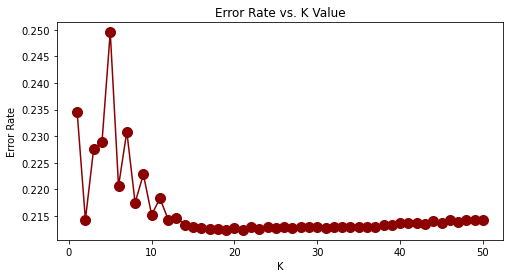

In [28]:
plt.figure(figsize=(8,4))
plt.plot(range(1,51),error_rate,color='darkred', marker='o',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [29]:
 ## Decisiontree

<AxesSubplot:>

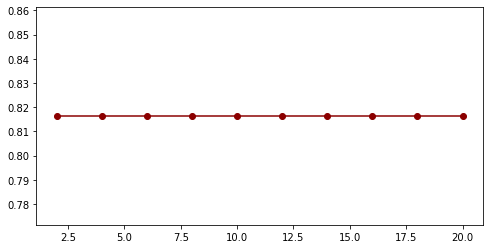

In [31]:

from sklearn.tree import DecisionTreeClassifier
results = []
max_depth_options = [2,4,6,8,10,12,14,16,18,20]
for trees in max_depth_options:
    model = DecisionTreeClassifier(max_depth=trees, random_state=101)
    model.fit(x_train_tfidf, y_train)
    y_pred = model.predict(x_validation_tfidf)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_depth_options).plot(color="darkred",marker="o")

<AxesSubplot:>

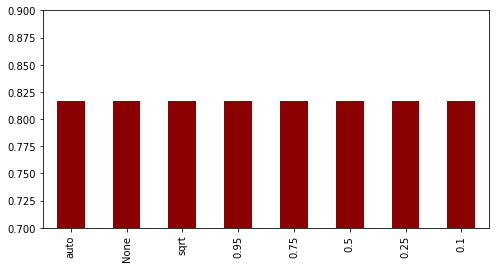

In [33]:
results = []
max_features_options = ['auto',None,'sqrt',0.95,0.75,0.5,0.25,0.10]
for trees in max_features_options:
    model = DecisionTreeClassifier(max_depth=10, random_state=101, max_features = trees)
    model.fit(x_train_tfidf, y_train)
    y_pred = model.predict(x_validation_tfidf)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_features_options).plot(kind="bar",color="darkred",ylim=(0.7,0.9))

<AxesSubplot:>

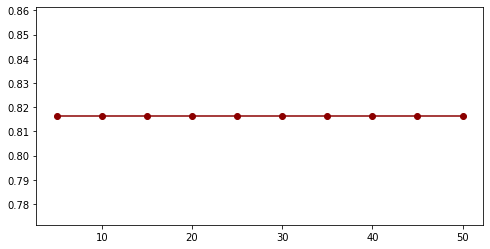

In [35]:
results = []
min_samples_leaf_options = [5,10,15,20,25,30,35,40,45,50]
for trees in min_samples_leaf_options:
    model = DecisionTreeClassifier(max_depth=10, random_state=101, max_features = None, min_samples_leaf = trees)
    model.fit(x_train_tfidf, y_train)
    y_pred = model.predict(x_validation_tfidf)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, min_samples_leaf_options).plot(color="darkred",marker="o")

In [40]:
##Random Forest
from sklearn.ensemble import RandomForestClassifier

C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


<AxesSubplot:>

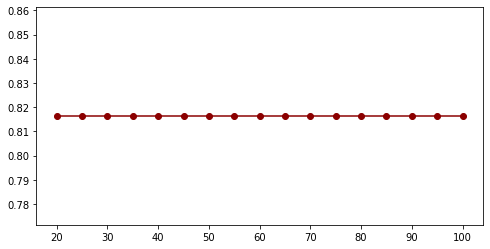

In [41]:
results = []
n_estimaor_options = [20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
for trees in n_estimaor_options:
    model = RandomForestClassifier(trees, oob_score=True, n_jobs=-1, random_state=101)
    model.fit(x_train_tfidf, y_train)
    y_pred = model.predict(x_validation_tfidf)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, n_estimaor_options).plot(color="darkred",marker="o")

<AxesSubplot:>

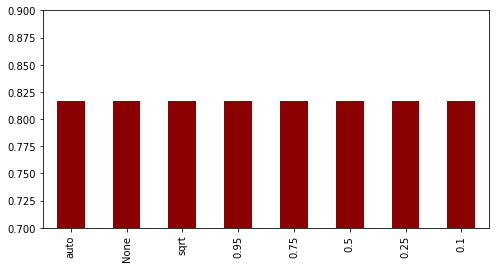

In [42]:
results = []
max_features_options = ['auto',None,'sqrt',0.95,0.75,0.5,0.25,0.10]
for trees in max_features_options:
    model = RandomForestClassifier(n_estimators=70, oob_score=True, n_jobs=-1, random_state=101, max_features = trees)
    model.fit(x_train_tfidf, y_train)
    y_pred = model.predict(x_validation_tfidf)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_features_options).plot(kind="bar",color="darkred",ylim=(0.7,0.9))

<AxesSubplot:>

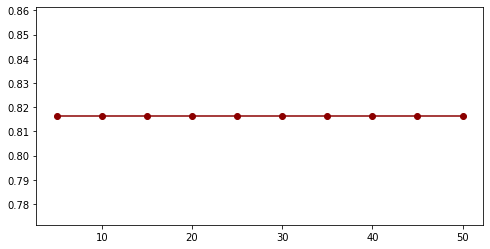

In [43]:
results = []
min_samples_leaf_options = [5,10,15,20,25,30,35,40,45,50]
for trees in min_samples_leaf_options:
    model = RandomForestClassifier(n_estimators=70, oob_score=True, n_jobs=-1, random_state=101, max_features = None, min_samples_leaf = trees)
    model.fit(x_train_tfidf, y_train)
    y_pred = model.predict(x_validation_tfidf)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, min_samples_leaf_options).plot(color="darkred",marker="o")

In [48]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

classification_models = []
classification_models.append(('Logistic Regression', LogisticRegression(solver="liblinear")))
classification_models.append(('K Nearest Neighbor', KNeighborsClassifier(n_neighbors=5, metric="minkowski",p=2)))
classification_models.append(('Kernel SVM', SVC(kernel = 'rbf',gamma='scale')))
classification_models.append(('Naive Bayes', GaussianNB()))
classification_models.append(('Stochastic Gradient Descent',SGDClassifier(loss='modified_huber', shuffle=True,random_state=101)))
classification_models.append(('Decision Tree', DecisionTreeClassifier(criterion = "entropy")))
classification_models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion="entropy")))

for name, model in classification_models:
    #kfold = KFold(n_splits=10, random_state=7)
    result = cross_val_score(model, x_train_tfidf, y_train,  scoring='accuracy')
                             #3. get the predictions for X_test and store it in y_pred
    y_pred = clf.predict(x_validation_tfidf)
#df_table = confusion_matrix(y_test,y_pred)

    df_table = confusion_matrix(y_test,y_pred)
    print("%s: accuracy:   %.2f%% " % (name, (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1])))
    print ("%s:precision:  %.2f%%" %(name, df_table[1,1] / (df_table[1,1] + df_table[0,1])))
    print("%s: recall:  %.2f%%" % (name, df_table[1,1] / (df_table[1,1] + df_table[1,0])))

    p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
    r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
    print("%s: f1 score: %.2f%% " % (name,(2*p*r)/(p+r)))
    #print (df_table)

    print("%s: Mean Accuracy = %.2f%% - SD Accuracy = %.2f%%" % (name, result.mean()*100, result.std()*100))


Logistic Regression: accuracy:   0.82% 
Logistic Regression:precision:  nan%
Logistic Regression: recall:  0.00%
Logistic Regression: f1 score: nan% 
Logistic Regression: Mean Accuracy = 81.63% - SD Accuracy = 0.00%


C:\Users\HP\AppData\Local\Temp\ipykernel_10280\2921438698.py:29: RuntimeWarning: invalid value encountered in longlong_scalars
  print ("%s:precision:  %.2f%%" %(name, df_table[1,1] / (df_table[1,1] + df_table[0,1])))
C:\Users\HP\AppData\Local\Temp\ipykernel_10280\2921438698.py:32: RuntimeWarning: invalid value encountered in longlong_scalars
  p = df_table[1,1] / (df_table[1,1] + df_table[0,1])


K Nearest Neighbor: accuracy:   0.82% 
K Nearest Neighbor:precision:  nan%
K Nearest Neighbor: recall:  0.00%
K Nearest Neighbor: f1 score: nan% 
K Nearest Neighbor: Mean Accuracy = 81.63% - SD Accuracy = 0.00%


C:\Users\HP\AppData\Local\Temp\ipykernel_10280\2921438698.py:29: RuntimeWarning: invalid value encountered in longlong_scalars
  print ("%s:precision:  %.2f%%" %(name, df_table[1,1] / (df_table[1,1] + df_table[0,1])))
C:\Users\HP\AppData\Local\Temp\ipykernel_10280\2921438698.py:32: RuntimeWarning: invalid value encountered in longlong_scalars
  p = df_table[1,1] / (df_table[1,1] + df_table[0,1])


Kernel SVM: accuracy:   0.82% 
Kernel SVM:precision:  nan%
Kernel SVM: recall:  0.00%
Kernel SVM: f1 score: nan% 
Kernel SVM: Mean Accuracy = 81.63% - SD Accuracy = 0.00%


C:\Users\HP\AppData\Local\Temp\ipykernel_10280\2921438698.py:29: RuntimeWarning: invalid value encountered in longlong_scalars
  print ("%s:precision:  %.2f%%" %(name, df_table[1,1] / (df_table[1,1] + df_table[0,1])))
C:\Users\HP\AppData\Local\Temp\ipykernel_10280\2921438698.py:32: RuntimeWarning: invalid value encountered in longlong_scalars
  p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\s

Naive Bayes: accuracy:   0.82% 
Naive Bayes:precision:  nan%
Naive Bayes: recall:  0.00%
Naive Bayes: f1 score: nan% 
Naive Bayes: Mean Accuracy = nan% - SD Accuracy = nan%


C:\Users\HP\AppData\Local\Temp\ipykernel_10280\2921438698.py:29: RuntimeWarning: invalid value encountered in longlong_scalars
  print ("%s:precision:  %.2f%%" %(name, df_table[1,1] / (df_table[1,1] + df_table[0,1])))
C:\Users\HP\AppData\Local\Temp\ipykernel_10280\2921438698.py:32: RuntimeWarning: invalid value encountered in longlong_scalars
  p = df_table[1,1] / (df_table[1,1] + df_table[0,1])


Stochastic Gradient Descent: accuracy:   0.82% 
Stochastic Gradient Descent:precision:  nan%
Stochastic Gradient Descent: recall:  0.00%
Stochastic Gradient Descent: f1 score: nan% 
Stochastic Gradient Descent: Mean Accuracy = 81.63% - SD Accuracy = 0.00%


C:\Users\HP\AppData\Local\Temp\ipykernel_10280\2921438698.py:29: RuntimeWarning: invalid value encountered in longlong_scalars
  print ("%s:precision:  %.2f%%" %(name, df_table[1,1] / (df_table[1,1] + df_table[0,1])))
C:\Users\HP\AppData\Local\Temp\ipykernel_10280\2921438698.py:32: RuntimeWarning: invalid value encountered in longlong_scalars
  p = df_table[1,1] / (df_table[1,1] + df_table[0,1])


Decision Tree: accuracy:   0.82% 
Decision Tree:precision:  nan%
Decision Tree: recall:  0.00%
Decision Tree: f1 score: nan% 
Decision Tree: Mean Accuracy = 81.63% - SD Accuracy = 0.00%


C:\Users\HP\AppData\Local\Temp\ipykernel_10280\2921438698.py:29: RuntimeWarning: invalid value encountered in longlong_scalars
  print ("%s:precision:  %.2f%%" %(name, df_table[1,1] / (df_table[1,1] + df_table[0,1])))
C:\Users\HP\AppData\Local\Temp\ipykernel_10280\2921438698.py:32: RuntimeWarning: invalid value encountered in longlong_scalars
  p = df_table[1,1] / (df_table[1,1] + df_table[0,1])


Random Forest: accuracy:   0.82% 
Random Forest:precision:  nan%
Random Forest: recall:  0.00%
Random Forest: f1 score: nan% 
Random Forest: Mean Accuracy = 81.63% - SD Accuracy = 0.00%


C:\Users\HP\AppData\Local\Temp\ipykernel_10280\2921438698.py:29: RuntimeWarning: invalid value encountered in longlong_scalars
  print ("%s:precision:  %.2f%%" %(name, df_table[1,1] / (df_table[1,1] + df_table[0,1])))
C:\Users\HP\AppData\Local\Temp\ipykernel_10280\2921438698.py:32: RuntimeWarning: invalid value encountered in longlong_scalars
  p = df_table[1,1] / (df_table[1,1] + df_table[0,1])


In [49]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
ch2_result = []
for n in np.arange(1,40,10):
    ch2 = SelectKBest(chi2, k=n)
    x_train_chi2_selected = ch2.fit_transform(x_train_tfidf, y_train)
    x_validation_chi2_selected = ch2.transform(x_validation_tfidf)
    
    clf = RandomForestClassifier()
    clf.fit(x_train_chi2_selected, y_train)
    #3. get the predictions for X_test and store it in y_pred
    y_pred = clf.predict(x_validation_chi2_selected)
   #4. print the classfication report
    print(classification_report(y_test, y_pred))
    print ("chi2 feature selection evaluation calculated for {} features".format(n))

C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90     10393
         1.0       0.00      0.00      0.00      2338

    accuracy                           0.82     12731
   macro avg       0.41      0.50      0.45     12731
weighted avg       0.67      0.82      0.73     12731

chi2 feature selection evaluation calculated for 1 features


C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90     10393
         1.0       0.00      0.00      0.00      2338

    accuracy                           0.82     12731
   macro avg       0.41      0.50      0.45     12731
weighted avg       0.67      0.82      0.73     12731

chi2 feature selection evaluation calculated for 11 features


C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90     10393
         1.0       0.00      0.00      0.00      2338

    accuracy                           0.82     12731
   macro avg       0.41      0.50      0.45     12731
weighted avg       0.67      0.82      0.73     12731

chi2 feature selection evaluation calculated for 21 features
              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90     10393
         1.0       0.00      0.00      0.00      2338

    accuracy                           0.82     12731
   macro avg       0.41      0.50      0.45     12731
weighted avg       0.67      0.82      0.73     12731

chi2 feature selection evaluation calculated for 31 features


C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)
d2v_ugdbow_tgdmm_std = scaler.fit_transform(x_train_tfidf)
d2v_ugdbow_tgdmm_std_val = scaler.fit_transform(x_validation_tfidf)

In [58]:
d2v_ugdbow_tgdmm_std_val

<12731x47 sparse matrix of type '<class 'numpy.float64'>'
	with 598357 stored elements in Compressed Sparse Row format>

In [64]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
ch2_result = []

clf = RandomForestClassifier()
clf.fit(d2v_ugdbow_tgdmm_std, y_train)

y_pred = clf.predict(d2v_ugdbow_tgdmm_std_val)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90     10393
         1.0       0.00      0.00      0.00      2338

    accuracy                           0.82     12731
   macro avg       0.41      0.50      0.45     12731
weighted avg       0.67      0.82      0.73     12731



C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
#from sklearn.decomposition import SparsePCA
#pca = SparsePCA(n_components=2)
#principalComponents = pca.fit_transform(d2v_ugdbow_tgdmm_std,d2v_ugdbow_tgdmm_std_val )
#principalDf = pd.DataFrame(data = principalComponents
#             , columns = ['principal component 1', 'principal component 2'])

IndentationError: unexpected indent (687867651.py, line 5)